In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28,28
#input_shape = (1, img_rows, img_cols)
input_shape = (28, 28, 1)
(x_train, y_train) , (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


0


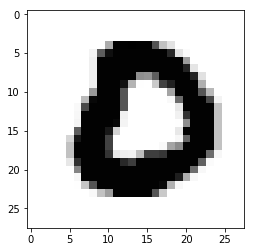

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 8531 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

#y_train = keras.utils.to_categorical(y_train,num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


model = Sequential()
#model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation ='softmax'))

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test loss ', score[0])
print('Test accuracy', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.3582 - acc: 0.8870 - val_loss: 0.0587 - val_acc: 0.9814
Epoch 2/12
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1020 - acc: 0.9710 - val_loss: 0.0480 - val_acc: 0.9846
Epoch 3/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0782 - acc: 0.9775 - val_loss: 0.0353 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0654 - acc: 0.9812 - val_loss: 0.0298 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0564 - acc: 0.9838 - val_loss: 0.0307 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0526 - acc: 0.9847 - val_loss: 0.0290 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 141s 2ms/step - 

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg16 = VGG16(weights = 'imagenet',include_top="false")
model.summary()

553467904/553467096 [==============================] - 12s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_